<a href="https://colab.research.google.com/github/kserdem/Veri-On-Isleme-Adimlari/blob/main/Veri_On_Isleme3_Transformation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

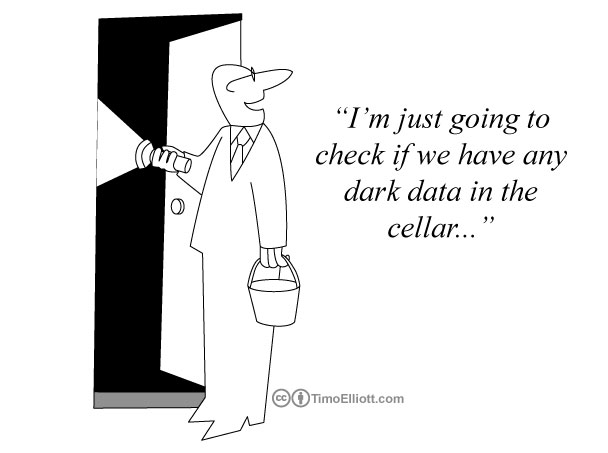

# Data Info
Dataset contains 9576 rows and 10 variables with essential meanings:

* car: manufacturer brand
* price: seller’s price in advertisement (in USD)
* body: car body type
*mileage: as mentioned in advertisement (‘000 Km)
*engV: rounded engine volume (‘000 cubic cm)
*engType: type of fuel (“Other” in this case should be treated as NA)
*registration: whether car registered in Ukraine or not
*year: year of production
*model: specific model name
*drive: drive type
*Data has gaps, so be careful and check for NA’s.
*I tried to check and drop repeated offers, but theoretically duplications are possible.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
data=pd.read_csv('/content/drive/MyDrive/Colab_projects/VeriÖnİşleme/car_ad.csv',encoding ='iso-8859-9')

In [ ]:
data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [ ]:
#Burada include argümanını 'all' olarak belirlediğimizde kategorik ve sayısal değişkenleri tanımlayıcı istatistikleri beraber elde ederiz
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
car,9576,87,Volkswagen,936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,9576,NaN,NaN,NaN,15633.3,24106.5,0,4999,9200,16700,547800
body,9576,6,sedan,3646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mileage,9576,NaN,NaN,NaN,138.862,98.6298,0,70,128,194,999
engV,9142,NaN,NaN,NaN,2.64634,5.9277,0.1,1.6,2,2.5,99.99
engType,9576,4,Petrol,4379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
registration,9576,2,yes,9015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,9576,NaN,NaN,NaN,2006.61,7.06792,1953,2004,2008,2012,2016
model,9576,888,E-Class,199,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive,9065,3,front,5188,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9576 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           9576 non-null   object 
 1   price         9576 non-null   float64
 2   body          9576 non-null   object 
 3   mileage       9576 non-null   int64  
 4   engV          9142 non-null   float64
 5   engType       9576 non-null   object 
 6   registration  9576 non-null   object 
 7   year          9576 non-null   int64  
 8   model         9576 non-null   object 
 9   drive         9065 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 748.2+ KB


In [ ]:

data.isnull().sum()

car               0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
year              0
model             0
drive           511
dtype: int64

* Veri setimizde eksik gözlemler bulunuyor. [Daha önceki yazıda eksik gözlem analizinden](https://kardelenerdem.com/2021/06/25/veri-on-isleme-adim-1-eksik-gozlem-analizi/) uzunca bahsettiğimden dolayı buaşamada uzunca eksik gözlem ile ilgili bir çalışma yapmayıp eksik gözlemleri veri setinden silerek devam edeceğim.

In [4]:
new_data=data.dropna()

* **Veri Tiplerine göre ayrı ayrı inceleme yapmak için;**

In [ ]:
new_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
data.describe(include='object')

,car,body,engType,registration,model,drive
count,9576,9576,9576,9576,9576,9065
unique,87,6,4,2,888,3
top,Volkswagen,sedan,Petrol,yes,E-Class,front
freq,936,3646,4379,9015,199,5188


In [ ]:
data.describe(include='float64')

,price,engV
count,9576.000000,9142.000000
mean,15633.317316,2.646344
std,24106.523436,5.927699
min,0.000000,0.100000
25%,4999.000000,1.600000
50%,9200.000000,2.000000
75%,16700.000000,2.500000
max,547800.000000,99.990000


In [ ]:
data.describe(include='int64')

,mileage,year
count,9576.000000,9576.000000
mean,138.862364,2006.605994
std,98.629754,7.067924
min,0.000000,1953.000000
25%,70.000000,2004.000000
50%,128.000000,2008.000000
75%,194.000000,2012.000000
max,999.000000,2016.000000


# SAYISAL DEĞİŞKEN DÖNÜŞÜMLERİ
* Sayısal dönüşüm yapılacak değişkenler mileage ve engV değişkenleri.
* Price değişkeni içinde dönüşüm yapabiliriz ancak tahmin değişkenimiz price olduğu için bu değişkene dokunmayacağız.

## 1) STANDART SCALER

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
std_scaler= new_data.copy()

* Burada tahmin (target) değişkeni price olduğu için bu değişken üzerinde herhangi bir dönüşüm yapmayacağız.
* mileage ve engV değişkenlerini birimsizleştirmek için dönüşüm yapacağız.

In [ ]:
std_scaler.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
std_scaler.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8739 entries, 0 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   car           8739 non-null   object 
 1   price         8739 non-null   float64
 2   body          8739 non-null   object 
 3   mileage       8739 non-null   float64
 4   engV          8739 non-null   float64
 5   engType       8739 non-null   object 
 6   registration  8739 non-null   object 
 7   year          8739 non-null   int64  
 8   model         8739 non-null   object 
 9   drive         8739 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 751.0+ KB


In [ ]:
scaler = StandardScaler()

std_scaler[['mileage','engV']] = scaler.fit_transform(std_scaler[['mileage','engV']])
std_scaler

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,-0.736520,-0.016359,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.336150,-0.145597,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,-0.052054,0.537518,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.223775,-0.145597,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,-0.583281,-0.108672,Petrol,yes,2013,X-Trail,full
...,...,...,...,...,...,...,...,...,...,...
9571,Hyundai,14500.0,crossover,-0.000975,-0.108672,Gas,yes,2011,Tucson,front
9572,Volkswagen,2200.0,vagon,0.101184,-0.182522,Petrol,yes,1986,Passat B2,front
9573,Mercedes-Benz,18500.0,crossover,0.407661,0.168267,Petrol,yes,2008,ML 350,full
9574,Lexus,16999.0,sedan,0.101184,0.168267,Gas,yes,2008,ES 350,front


## 2) NORMALİZASYON

In [ ]:
from sklearn import preprocessing

In [ ]:
normalize_df=new_data.copy()

In [ ]:
normalize_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
normalize_df[['mileage','engV']]=preprocessing.normalize(normalize_df[['mileage','engV']])
normalize_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,0.999325,0.036740,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.999946,0.010404,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.999171,0.040707,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.999938,0.011110,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,0.999710,0.024089,Petrol,yes,2013,X-Trail,full


## 3) MİN-MAX SCALER

In [ ]:
from sklearn.preprocessing import MinMaxScaler


In [ ]:
minmax_df=new_data.copy()

In [ ]:
minmax_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


* MinMax Scaler feature range belirtmediğimiz zaman değişkenleri  default olarak (0,1) aralığında dönüştürür. 
* Proje özelinde değişkenler üzerinde özellikle yapmak istediğimiz bir dönüşüm varsa  ***feature_range=(min,max)*** ile değişkeni istediğimiz aralığa çekebiliriz.

In [ ]:
trans = MinMaxScaler()
minmax_df[['mileage','engV']]= trans.fit_transform(minmax_df[['mileage','engV']])
minmax_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,0.068068,0.024026,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.173173,0.017019,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.135135,0.054059,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.162162,0.017019,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,0.083083,0.019021,Petrol,yes,2013,X-Trail,full


In [ ]:
# Daha fazla bilgiye ulaşmak için dökümana böyle ulaşabiliriz.
?MinMaxScaler

*  MinMax Scaler dönüşümünü feature_range belirterek gerçekleştirelim.

In [ ]:
minmax_range=new_data.copy()

In [ ]:
scaler = preprocessing.MinMaxScaler(feature_range = (100,200))

In [ ]:
minmax_range[['mileage','engV']]=scaler.fit_transform(minmax_range[['mileage','engV']])

In [ ]:
minmax_range.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,106.806807,102.402643,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,117.317317,101.701872,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,113.513514,105.405947,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,116.216216,101.701872,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,108.308308,101.902092,Petrol,yes,2013,X-Trail,full


## 4) MAXABS SCALER

In [ ]:
from sklearn.preprocessing import MaxAbsScaler


In [ ]:
maxabs_df=new_data.copy()

In [ ]:
maxabs_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
abs_scaler= MaxAbsScaler()
abs_scaler.fit(maxabs_df[['mileage','engV']])
maxscale=abs_scaler.transform(maxabs_df[['mileage','engV']])

In [ ]:
scaled= pd.DataFrame(maxscale, columns=['mileage','engV'])
scaled.head()

,mileage,engV
0,0.068068,0.025003
1,0.173173,0.018002
2,0.135135,0.055006
3,0.162162,0.018002
4,0.083083,0.020002


## 5) ROBUST SCALER

In [ ]:
from sklearn.preprocessing import RobustScaler


In [ ]:
robust_df=new_data.copy()
robust_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
robust_scale = RobustScaler()

In [ ]:
robust_df[['mileage','engV']]=robust_scale.fit_transform(robust_df[['mileage','engV']])

In [ ]:
robust_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,-0.497992,0.555556,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.345382,-0.222222,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.040161,3.888889,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.257028,-0.222222,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,-0.377510,0.000000,Petrol,yes,2013,X-Trail,full


## 6) QUANTILE TRANSFORMER SCALER

* Quantile transformer scalerde çıktı dağılımını 'normal', 'uniform' olarak belirleyebiliriz. Eğer herhangi bir argüman belirtmezsek default olarak uniform dağılıma göre çıktı verecektir.

In [ ]:
from sklearn.preprocessing import QuantileTransformer

In [ ]:
quantile_df=new_data.copy()
quantile_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
quantile = QuantileTransformer(output_distribution='normal')
quantile_df[['mileage','engV']] = quantile.fit_transform(quantile_df[['mileage','engV']])
quantile_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,-0.721714,0.602943,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.468203,-0.397918,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.067799,2.033104,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.364191,-0.397918,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,-0.537980,0.058999,Petrol,yes,2013,X-Trail,full


In [ ]:
quantile_uniform=new_data.copy()
quantile_uni = QuantileTransformer()
quantile_uniform[['mileage','engV']] = quantile_uni.fit_transform(quantile_uniform[['mileage','engV']])
quantile_uniform.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,0.235235,0.726727,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.680180,0.345345,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.527027,0.978979,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.642142,0.345345,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,0.295295,0.523524,Petrol,yes,2013,X-Trail,full


* mileage değişkeninin transformation yapmadan önce sağa çarpık olduğunu görüyoruz.

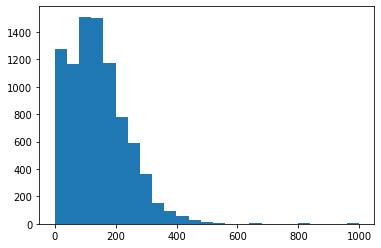

In [ ]:
from matplotlib import pyplot
pyplot.hist(new_data['mileage'], bins=25)
pyplot.show()

* Çıktı argümanını normal dağılım olaran belirttiğimizde sağa çarpık olan değişkenimiz normal dağılım gösterdi.

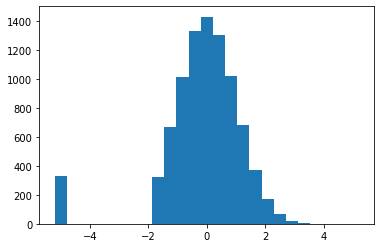

In [ ]:
pyplot.hist(quantile_df['mileage'], bins=25)
pyplot.show()

* Çıktı argümanını default olarak bıraktığımızda değişkenimiz uniform dağılıma göre transform edildi.

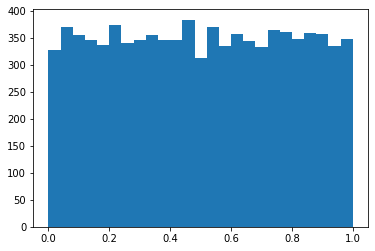

In [ ]:
pyplot.hist(quantile_uniform['mileage'], bins=25)
pyplot.show()

## 7) POWER TRANSFORMER SCALER
* Genellikle dağılımdaki çarpıklığın giderilmesi ve varyansın stabilize edilmesi için kullanılır.
* Bu amaçlar için Box-Cox Dönüşümü ve Yeo-Johnson Dönüşümü kullanılır.

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
power_trans=new_data.copy()

* method olarak herhangi birşey belirtmezsek default olarak yeo-johnson dönüşümünü kullanır.

In [ ]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
power_trans[['mileage','engV']] = power.fit_transform(power_trans[['mileage','engV']])

In [ ]:
power_trans.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,-0.616170,0.547250,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,0.475604,-0.336079,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,0.128122,2.030043,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,0.378838,-0.336079,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,-0.428393,-0.036359,Petrol,yes,2013,X-Trail,full


# KATEGORİK DEĞİŞKEN DÖNÜŞÜMLERİ

* Kategorik değişken dönüşümünü 'car', 'body', 'engtype', 'model', 'registration' ve 'drive' değişkenleri üzerinde yapabiliriz 

In [ ]:
new_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [18]:
#değişkenlerin unique değerlerini inceleyelim
cat_data = new_data[['car','body','engType','model','drive']]



In [ ]:
for i in cat_data:
  a=cat_data[i].unique()
  print(i)
  print(a)

## KATEGORİLER ARASINDA SIRALAMA YOKSA KULLANILABİLECEK DÖNÜŞÜMLER

### ONE HOT ENCODER (Scikit-Learn)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
one_hotdf=new_data.copy()

In [ ]:
cat_data= one_hotdf.select_dtypes(include=[object])
cat_data.head()

,car,body,engType,registration,model,drive
0,Ford,crossover,Gas,yes,Kuga,full
1,Mercedes-Benz,sedan,Gas,yes,E-Class,rear
2,Mercedes-Benz,other,Petrol,yes,CL 550,rear
3,Mercedes-Benz,van,Diesel,yes,B 180,front
5,Nissan,crossover,Petrol,yes,X-Trail,full


* One Hot Encoding yapmadan önce kategorileri sayısal forma dönüştürmeliyiz

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

cat_data['engType']= label_encoder.fit_transform(cat_data['engType']) 
cat_data.head()

,car,body,engType,registration,model,drive
0,Ford,crossover,1,yes,Kuga,full
1,Mercedes-Benz,sedan,1,yes,E-Class,rear
2,Mercedes-Benz,other,3,yes,CL 550,rear
3,Mercedes-Benz,van,0,yes,B 180,front
5,Nissan,crossover,3,yes,X-Trail,full


In [ ]:
encoder= OneHotEncoder()
df_encoder = pd.DataFrame(encoder.fit_transform(cat_data['engType'].values.reshape(-1,1)).toarray())
df_encoder

,0,1,2,3
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0
...,...,...,...,...
8734,0.0,1.0,0.0,0.0
8735,0.0,0.0,0.0,1.0
8736,0.0,0.0,0.0,1.0
8737,0.0,1.0,0.0,0.0


### GET DUMMIES (Pandas)

In [ ]:
dummy_df=new_data.copy()

In [ ]:
dummy_df.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
5,Nissan,16600.0,crossover,83,2.0,Petrol,yes,2013,X-Trail,full


In [ ]:
dummy_df=pd.get_dummies(dummy_df,columns=["engType","drive"])
dummy_df.head()

,car,price,body,mileage,engV,registration,year,model,engType_Diesel,engType_Gas,engType_Other,engType_Petrol,drive_front,drive_full,drive_rear
0,Ford,15500.0,crossover,68,2.5,yes,2010,Kuga,0,1,0,0,0,1,0
1,Mercedes-Benz,20500.0,sedan,173,1.8,yes,2011,E-Class,0,1,0,0,0,0,1
2,Mercedes-Benz,35000.0,other,135,5.5,yes,2008,CL 550,0,0,0,1,0,0,1
3,Mercedes-Benz,17800.0,van,162,1.8,yes,2012,B 180,1,0,0,0,1,0,0
5,Nissan,16600.0,crossover,83,2.0,yes,2013,X-Trail,0,0,0,1,0,1,0


## KATEGORİLER ARASINDA SIRALAMA VARSA KULLANILABİLECEK DÖNÜŞÜMLER 

### ORDINAL ENCODER (Scikit-Learn)

In [16]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
cat_data = new_data[['car','body','engType','model','drive']]


In [22]:
col_names=[]
for i in cat_data.columns:
  col_names.append(i)

col_names

['car', 'body', 'engType', 'model', 'drive']

In [19]:
cat_data.head()

,car,body,engType,model,drive
0,Ford,crossover,Gas,Kuga,full
1,Mercedes-Benz,sedan,Gas,E-Class,rear
2,Mercedes-Benz,other,Petrol,CL 550,rear
3,Mercedes-Benz,van,Diesel,B 180,front
5,Nissan,crossover,Petrol,X-Trail,full


In [21]:
ordinal_encoder = OrdinalEncoder()
result = ordinal_encoder.fit_transform(cat_data)
print(result)

[[ 23.   0.   1. 473.   1.]
 [ 50.   3.   1. 321.   2.]
 [ 50.   2.   3. 231.   2.]
 ...
 [ 50.   0.   3. 523.   1.]
 [ 43.   3.   1. 326.   0.]
 [  4.   2.   3. 623.   1.]]


In [ ]:
cat_data['model'].unique()

In [25]:
ord_enc = pd.DataFrame(result,columns=col_names)

In [26]:
ord_enc.head()

,car,body,engType,model,drive
0,23.0,0.0,1.0,473.0,1.0
1,50.0,3.0,1.0,321.0,2.0
2,50.0,2.0,3.0,231.0,2.0
3,50.0,5.0,0.0,199.0,0.0
4,55.0,0.0,3.0,818.0,1.0


### MAP FONKSİYONU (Pandas)

In [51]:
map_data= cat_data.copy()

In [38]:
map_data.head()

,car,body,engType,model,drive
0,Ford,crossover,Gas,Kuga,full
1,Mercedes-Benz,sedan,Gas,E-Class,rear
2,Mercedes-Benz,other,Petrol,CL 550,rear
3,Mercedes-Benz,van,Diesel,B 180,front
5,Nissan,crossover,Petrol,X-Trail,full


In [39]:
map_data['engType'].unique()

array(['Gas', 'Petrol', 'Diesel', 'Other'], dtype=object)

In [52]:
map_data['engType'] = map_data['engType'] .map({  'Gas':1, 'Petrol':2, 'Diesel':3})

In [53]:
map_data.head()

,car,body,engType,model,drive
0,Ford,crossover,1.0,Kuga,full
1,Mercedes-Benz,sedan,1.0,E-Class,rear
2,Mercedes-Benz,other,2.0,CL 550,rear
3,Mercedes-Benz,van,3.0,B 180,front
5,Nissan,crossover,2.0,X-Trail,full




> * Alternatif olarak ***cat.codes*** kullanılabilir.



In [42]:
map_data= cat_data.copy()

In [43]:
map_data['engType'] = map_data['engType'].astype('category').cat.codes

In [44]:
map_data.head()

,car,body,engType,model,drive
0,Ford,crossover,1,Kuga,full
1,Mercedes-Benz,sedan,1,E-Class,rear
2,Mercedes-Benz,other,3,CL 550,rear
3,Mercedes-Benz,van,0,B 180,front
5,Nissan,crossover,3,X-Trail,full


### BINARIZE DÖNÜŞÜM (Category Encoders)

In [9]:
pip install category-encoders

     |████████████████████████████████| 80 kB 8.1 MB/s 


In [10]:
from category_encoders import BinaryEncoder


In [ ]:
cat_data = new_data[['car','body','engType','model','drive']]


In [6]:
cat_data.head()

,car,body,engType,model,drive
0,Ford,crossover,Gas,Kuga,full
1,Mercedes-Benz,sedan,Gas,E-Class,rear
2,Mercedes-Benz,other,Petrol,CL 550,rear
3,Mercedes-Benz,van,Diesel,B 180,front
5,Nissan,crossover,Petrol,X-Trail,full


In [15]:
bin = BinaryEncoder(cols=['engType','drive','body'],return_df=True)
bin_data= bin.fit_transform(cat_data)
bin_data.head()

,car,body_0,body_1,body_2,body_3,engType_0,engType_1,model,drive_0,drive_1,drive_2
0,Ford,0,0,0,1,0,1,Kuga,0,0,1
1,Mercedes-Benz,0,0,1,0,0,1,E-Class,0,1,0
2,Mercedes-Benz,0,0,1,1,0,1,CL 550,0,1,0
3,Mercedes-Benz,0,1,0,0,0,1,B 180,0,1,1
5,Nissan,0,0,0,1,0,1,X-Trail,0,0,1


In [13]:
cat_data['engType'].unique()

array([0, 1])

# !!! BONUS REPLACE!!!

In [55]:
cat_data = new_data[['car','body','engType','model','drive']]
cat_data['body'].unique()

array(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],
      dtype=object)

In [56]:
cat_data.head()

,car,body,engType,model,drive
0,Ford,crossover,Gas,Kuga,full
1,Mercedes-Benz,sedan,Gas,E-Class,rear
2,Mercedes-Benz,other,Petrol,CL 550,rear
3,Mercedes-Benz,van,Diesel,B 180,front
5,Nissan,crossover,Petrol,X-Trail,full


In [57]:
cat_data['body']= cat_data.body.replace(['crossover', 'sedan', 'other', 'van', 'vagon', 'hatch'],[0,1,2,3,4,5])
cat_data.head()

,car,body,engType,model,drive
0,Ford,0,Gas,Kuga,full
1,Mercedes-Benz,1,Gas,E-Class,rear
2,Mercedes-Benz,2,Petrol,CL 550,rear
3,Mercedes-Benz,3,Diesel,B 180,front
5,Nissan,0,Petrol,X-Trail,full
